# Exploratory Data Analysis Project: US Accidents (1.5 million records)
##### A Countrywide Traffic Accident Dataset (2016 - 2020)

<img style="float:center" src="https://image.freepik.com/free-vector/traffic-accident-abstract-concept-vector-illustration-road-accident-report-traffic-laws-violation-single-car-crash-investigation-injury-statistics-multi-vehicle-collision-abstract-metaphor_335657-1800.jpg" alt="image" style="width:435px;height:366px;">

## Project Goals
* Analyze columns such as : City, State, Start time and more.
* Answer questions like: 

  -Where do traffic accidents are most common?
  
  -At what time of the day traffic accidents are more likely?


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/us-accidents/US_Accidents_Dec20_updated.csv


In [2]:
file_path = "../input/us-accidents/US_Accidents_Dec20_updated.csv"

df = pd.read_csv(file_path)

In [3]:
print(f"Number of columns: {df.shape[1]}")
print(f"Number of rows: {df.shape[0]}")

Number of columns: 47
Number of rows: 1516064


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [6]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

Many missing values like WindChill and precipitation which have 400k+ missing values

In [7]:
df = df[["Start_Time", "City", "State", "Temperature(F)", "Start_Lng", "Start_Lat"]]

In [8]:
df.head()

,Start_Time,City,State,Temperature(F),Start_Lng,Start_Lat
0,2016-02-08 00:37:08,Dublin,OH,42.1,-83.09286,40.10891
1,2016-02-08 05:56:20,Dayton,OH,36.9,-84.06280,39.86542
2,2016-02-08 06:15:39,Cincinnati,OH,36.0,-84.52468,39.10266
3,2016-02-08 06:15:39,Cincinnati,OH,36.0,-84.52341,39.10148
4,2016-02-08 06:51:45,Akron,OH,39.0,-81.53784,41.06213


**Let's start with geographical data**

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

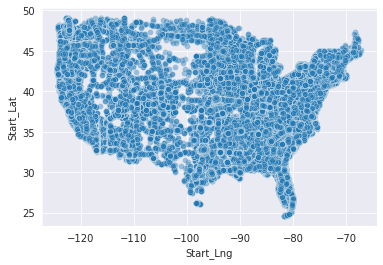

In [9]:
sns.set_style("darkgrid")
sns.scatterplot(x="Start_Lng", y="Start_Lat", data=df, alpha=0.4)

In [10]:
df["City"].nunique()

10657

In [11]:
df["State"].nunique()

49

In [12]:
count_city = df["City"].value_counts()
count_city

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
               ...  
Seney              1
Belle Mead         1
Eagle Nest         1
Pelican            1
Selby              1
Name: City, Length: 10657, dtype: int64

In [13]:
count_city[:20]

Los Angeles     39984
Miami           36233
Charlotte       22203
Houston         20843
Dallas          19497
Sacramento      18431
Orlando         16169
Portland        14805
San Diego       14090
Minneapolis     12653
Atlanta         11854
Chicago         11507
Saint Paul      10084
Phoenix          9934
Raleigh          9516
San Jose         9362
Richmond         8472
Nashville        8381
Riverside        8201
Jacksonville     7815
Name: City, dtype: int64

- There are cities with only 1 accident record
- New York isn't on the top cities being the most populated in the U.S

In [14]:
only_ny = df.loc[df["City"] == "New York"]
only_ny.head()

,Start_Time,City,State,Temperature(F),Start_Lng,Start_Lat
32547,2016-11-30 15:58:59,New York,NY,53.1,-73.943990,40.850020
32593,2016-11-30 17:31:55,New York,NY,53.1,-73.946580,40.771460
32683,2016-11-26 22:57:16,New York,NY,41.0,-73.973938,40.762979
32901,2016-12-01 12:14:13,New York,NY,53.1,-73.971240,40.744340
33089,2016-12-01 18:54:49,New York,NY,48.2,-74.002720,40.710680


In [15]:
only_ny.count().max()

4220

New York city is included in the dataset but has only 4000 recorded accidents.

In [16]:
#cities with more than 1000 records
high_accidents = count_city[count_city >= 1000]
high_accidents.head()

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Count'>

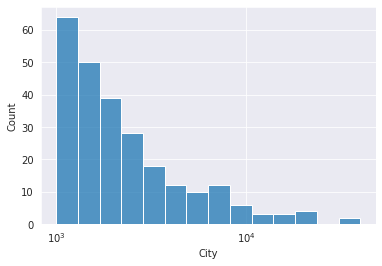

In [17]:
sns.histplot(high_accidents,  log_scale=True)

In [18]:
new_df = df[df["City"].isin(high_accidents.index)]

In [19]:
print(f"new_df has {round(((df.shape[0]-new_df.shape[0])/df.shape[0])*100, 4)}% less rows than the original dataframe")


new_df has 44.7796% less rows than the original dataframe


**A bit more than 40% of Cities of the original dataframe had less than 1000 records**


Quantity of accidents by State


In [20]:
accidents_by_state = new_df.groupby("State").City.count().sort_values(ascending=False)
accidents_by_state[:10]

State
CA    293395
FL    107215
TX     60975
OR     39115
NC     36395
MN     25025
NY     24978
VA     23259
AZ     23170
LA     15977
Name: City, dtype: int64

<AxesSubplot:xlabel='State', ylabel='City'>

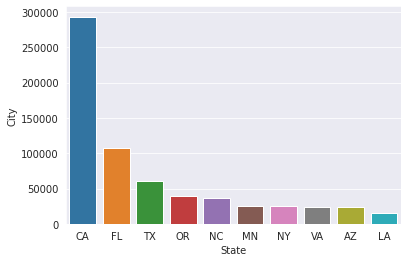

In [21]:
sns.barplot(x=accidents_by_state[:10].index , y=accidents_by_state[:10])

-California far surpasses other states in terms of traffic accidents 

-After Florida (2nd place), states don't reach the 100 000 mark.

**Parsing dates**

In [22]:
import datetime as dt

new_df["Start_Time"] = pd.to_datetime(new_df["Start_Time"])
new_df["Start_Time"].dt.year


1          2016
2          2016
3          2016
4          2016
5          2016
           ... 
1516058    2019
1516059    2019
1516060    2019
1516061    2019
1516062    2019
Name: Start_Time, Length: 837176, dtype: int64

<AxesSubplot:xlabel='Start_Time', ylabel='count'>

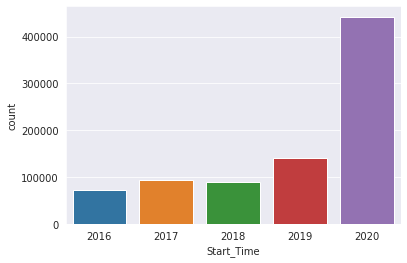

In [23]:
sns.countplot(new_df["Start_Time"].dt.year)

2020 was the year with most traffic accident records.

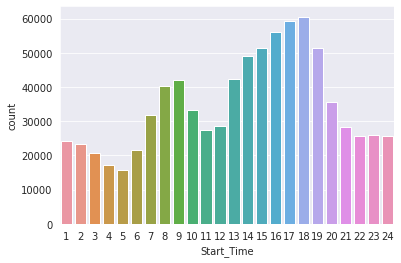

In [24]:
#wrapping the set_xticlabels stament inside a variable to hide the text objects
p = sns.countplot(new_df["Start_Time"].dt.hour)
var = p.set_xticklabels([x for x in range(1, 25)])

Much of the accidents are happening between 2pm and 7pm.

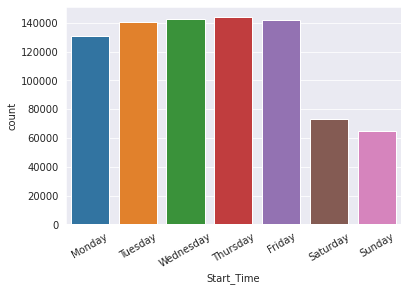

In [25]:
g = sns.countplot(new_df["Start_Time"].dt.dayofweek)
var = g.set_xticklabels(rotation=30, labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

Weekdays are the most dangerous, maybe people are in a hurry to go to their jobs from monday to friday.

In [26]:
month_vc = new_df["Start_Time"].dt.month.value_counts().sort_index()
month_vc

1      48334
2      43867
3      53415
4      59613
5      60241
6      63396
7      28502
8      33916
9      69546
10    100318
11    122107
12    153921
Name: Start_Time, dtype: int64

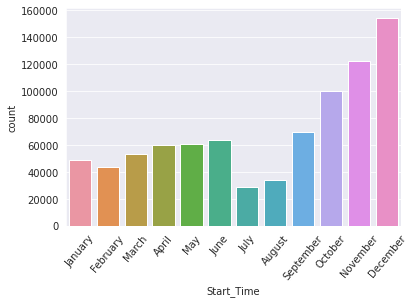

In [27]:
g = sns.countplot(new_df["Start_Time"].dt.month)
var = g.set_xticklabels(rotation=50, labels=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

September to December are the months with the most accidents. Maybe it's correlated to the tempature and frozen roads.

In [28]:
temp_f = new_df.groupby(new_df["Start_Time"].dt.month)["Temperature(F)"].mean()
temp_c = pd.Series([((x-32)*5/9) for x in temp_f], index=temp_f.index)
print("Temperature in Celsius:")
list(temp_c)

Temperature in Celsius:


[8.7660888532012,
 10.758935143217817,
 13.624706408560511,
 16.71307216198959,
 20.961207372358032,
 25.09853298499125,
 27.051531894919467,
 26.182647165041445,
 23.692988452986963,
 19.517055375299645,
 15.193682078165446,
 10.084974859115837]

In [29]:
cor = month_vc.corr(temp_c)
cor

-0.3855415978286499

Negative correlation between the amount of accidents each month and the temperature. No luck.

***Of the dataset i can conclude the following statements:***

* The state of California has the highest traffic accidients(293 395) with almost 3 times the  records compared to Florida,the second place(107 215). 

* Not surprisingly Los angeles, miami and many other cities inside the states named beforehand have the most accident records.

* Any weekday of December between 7am to 10am and 2pm to 7pm are the most dangerous times to drive, especially in the state of California.

* Lastly, the dataset is missing data from many cities and/or has gathered most of the data from a few States.